In [16]:
import sklearn.datasets as d

boston = d.load_boston()

In [3]:
import pandas as pd

# 특성(독립변수)들을 DataFrame으로 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 종속변수 덧붙임
boston_df["PRICE"] = boston.target

# 데이터의 형태와 크기 확인
print(boston_df.shape)

# 데이터의 일부 확인
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


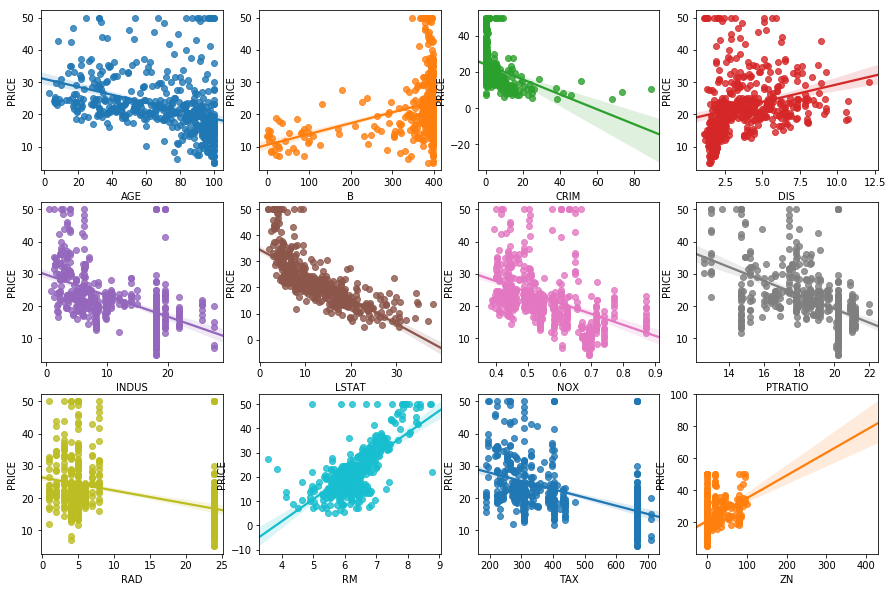

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3행 4열의 subplot 준비
fig, axs = plt.subplots(figsize = (15, 10), nrows = 3, ncols = 4)

# 전체 컬럼들에서 종속변수 및 불필요한 컬럼 제거
features = [f for f in list(boston_df.columns)[:-1] if f != "CHAS"]
features.sort()

for i, feature in enumerate(features) :
    # 현재 subplot의 행/열 번호 갱신
    r = int(i / 4)
    c = i % 4
    # 산점도와 회귀선을 그린다.
    sns.regplot(x = feature, y = "PRICE", data = boston_df, ax = axs[r][c])

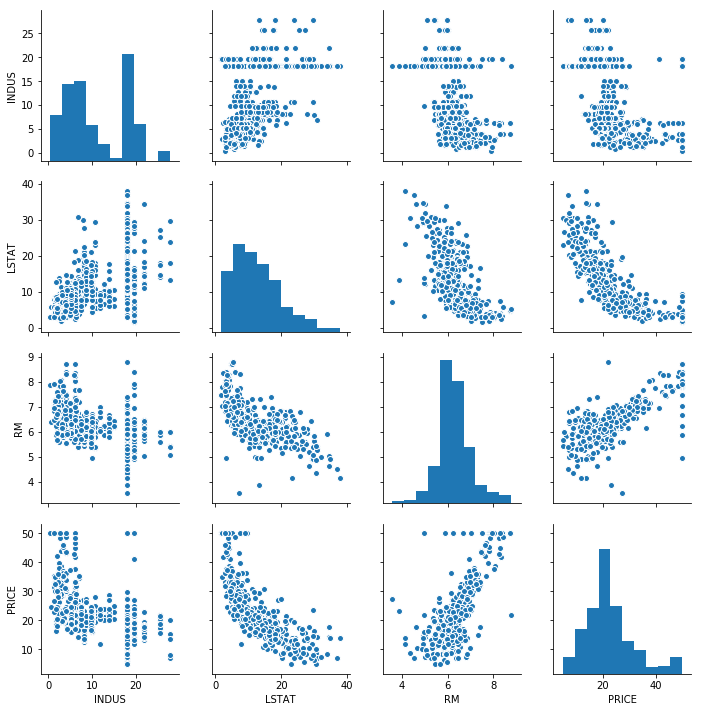

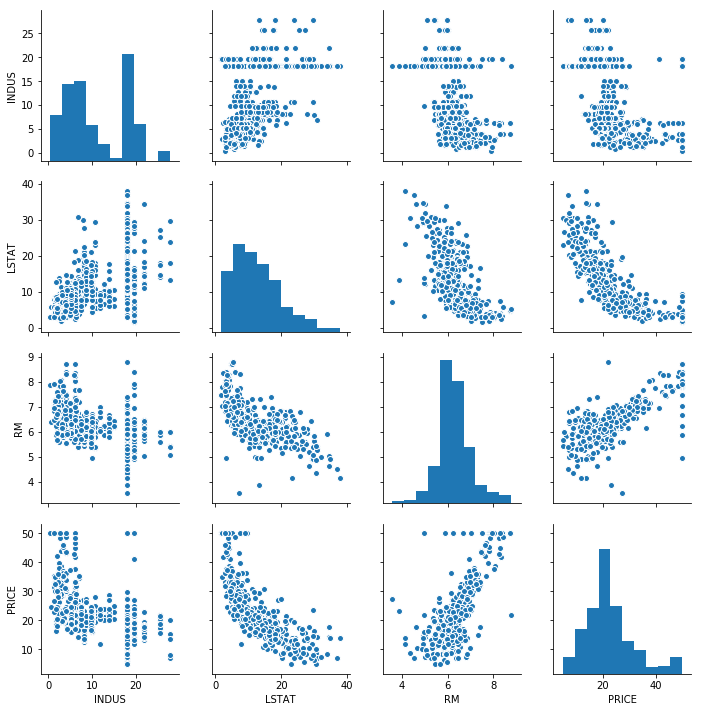

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 칼럼들에서 상호간의 관계를 파악할 변수들을 선정
ccol = ["INDUS", "LSTAT", "RM", "PRICE"]

# 페어플롯
sns.pairplot(boston_df[ccol])

# 또는 매개변수로 컬럼들을 직접 선택해서 그릴 수 있음
sns.pairplot(boston_df, vars = ccol)

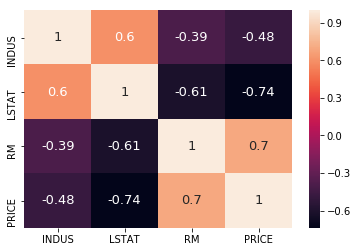

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 칼럼들에서 상호간의 관계를 파악할 변수들을 선정
ccol = ["INDUS", "LSTAT", "RM", "PRICE"]

# 변수들 간의 상관 계수 구함
corrs = boston_df[ccol].corr()

# 상관계수 값에 대한 히트맵을 그림
# 매개변수 annot은 맵 상에 값을 표시할 것인지 여부 지정
# 매개변수 annot_kws는 표시되는 값에 대한 추가 옵션
sns.heatmap(corrs, annot=True, annot_kws={"size":13})

In [9]:
import sklearn.model_selection as ms

# DataFrame에서 독립변수와 종속변수를 다시 구분
X = boston_df.drop(["PRICE"], 1)
y = boston_df["PRICE"]

# 학습용 및 검증용 데이터로 분리
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 42)

# 데이터의 일부 확인
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [11]:
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

# 훈련 데이터로 학습 수행
reg = lm.LinearRegression().fit(X_train, y_train)

# 검증 데이터로 예측 수행
y_pred = reg.predict(X_test)

# 평가 지표 값들 계산
mse = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)

# 평가 지표 값들 출력
print("MSE: {:.3f}\nRMSE: {:.3f}\nR2: {:.3f}".format(mse, rmse, r2))

MSE: 21.540
RMSE: 4.641
R2: 0.711


In [12]:
# 데이터의 크기(레코드 개수)
n = len(X_train)

# 독립변수의 개수
k = len(X_train.columns)

# 수정된 결정 계수 값 계산
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))

# 수정된 결정 계수 값 출력
print("Adjusted R2: {:.4f}".format(adj_r2))

Adjusted R2: 0.6999


In [13]:
# ndarry의 실수값들을 부동소수점으로 출력되도록 옵션 변경
# suppress = True : 1.2e^03...처럼 안나오게함.
np.set_printoptions(suppress = True)

# 회귀 계수를 적절히 반올림하여 출력
# 값이 배열이므로 numpy의 내장함수 round 사용
print("회귀계수:", np.round(reg.coef_, 3))

# 절편 값을 적절히 반올림하여 출력
# 값이 하나이므로 단순하게 내장함수 round 사용
print("절편:", round(reg.intercept_, 3))

# ndarray의 실수값 출력 옵션을 원래대로 되돌린다.
np.set_printoptions(suppress = False)

회귀계수: [ -0.133   0.036   0.05    3.121 -15.47    4.049  -0.011  -1.387   0.242
  -0.009  -0.912   0.012  -0.548]
절편: 31.682


In [14]:
# 각 독립변수 이름이 인덱스가 되도록 회귀 계수를 Series로 생성
coefs = pd.Series(data = np.round(reg.coef_, 3), index = X.columns)

# 생성한 Series를 값의 내림차순으로 정렬
coefs_sort = coefs.sort_values(ascending = False)

# 결과 확인
print(coefs_sort)

RM          4.049
CHAS        3.121
RAD         0.242
INDUS       0.050
ZN          0.036
B           0.012
TAX        -0.009
AGE        -0.011
CRIM       -0.133
LSTAT      -0.548
PTRATIO    -0.912
DIS        -1.387
NOX       -15.470
dtype: float64


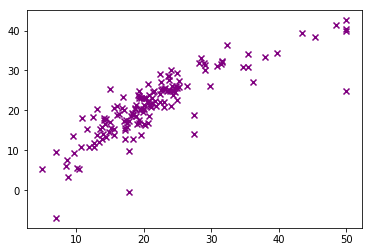

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, marker = 'x', color = 'purple')

In [15]:
import statsmodels.api as sm

# 훈련 데이터로 학습 수행
# OLS()는 y, x 순!
# OLS에 인자가 들어가있으므로, 그냥 fit()으로 가능!
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

# 평가 지표 값들 출력
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.95e-92
Time:                        15:15:17   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6821      6.057      5.231      0.0

In [ ]:
# const : 절편 값
# P>|t| : 0.05보다 크면 해당 변수는 PRICE와 통계적으로 유의하지 않다.